# EDA sobre las vacaciones a París o Roma

Una vez extraidos todos los datos necesario comenzaremso enuestro EDA personalizado para un viaje en solitario (con opción ampliable) para una persona dure el puente de diciembre de 2024.

## **Vuelos**

Comenzamos cargando todos los datos y haciendo una limpieza.

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [366]:
# Cargamos los DataFrame
df_vuelos_roma = pd.read_csv("../datos/df_vuelos_roma.csv", index_col=0)
df_vuelos_paris = pd.read_csv("../datos/df_vuelos_paris.csv", index_col=0)

In [367]:
# Obtenemos el formato hora deseado
columnas_a_convertir = ["hora_salida_ida", "hora_llegada_ida", "hora_salida_vuelta", "hora_llegada_vuelta"]
for col in columnas_a_convertir:
    df_vuelos_roma[col] = pd.to_datetime(df_vuelos_roma[col], format='%H:%M', errors='coerce').dt.time
for col in columnas_a_convertir:
    df_vuelos_paris[col] = pd.to_datetime(df_vuelos_paris[col], format='%H:%M', errors='coerce').dt.time

df_vuelos_paris.head(2)

,precio,origen_ida,destino_ida,min_duracion_ida,escalas_ida,hora_salida_ida,hora_llegada_ida,aerolinea_ida,origen_vuelta,destino_vuelta,min_duracion_vuelta,escalas_vuelta,hora_salida_vuelta,hora_llegada_vuelta,aerolinea_vuelta
0,150.73,Madrid,Paris Charles de Gaulle,130,0,21:40:00,23:50:00,Iberia,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Iberia
1,341.73,Madrid,Paris Charles de Gaulle,130,0,12:25:00,14:35:00,Air France,Paris Charles de Gaulle,Madrid,125,0,14:55:00,17:00:00,Air France


Comprobamos si hay nulos:

In [368]:
df_vuelos_roma.isnull().sum()

precio                 0
origen_ida             0
destino_ida            0
min_duracion_ida       0
escalas_ida            0
hora_salida_ida        0
hora_llegada_ida       0
aerolinea_ida          0
origen_vuelta          0
destino_vuelta         0
min_duracion_vuelta    0
escalas_vuelta         0
hora_salida_vuelta     0
hora_llegada_vuelta    0
aerolinea_vuelta       0
dtype: int64

In [369]:
df_vuelos_paris.isnull().sum()

precio                 0
origen_ida             0
destino_ida            0
min_duracion_ida       0
escalas_ida            0
hora_salida_ida        0
hora_llegada_ida       0
aerolinea_ida          0
origen_vuelta          0
destino_vuelta         0
min_duracion_vuelta    0
escalas_vuelta         0
hora_salida_vuelta     0
hora_llegada_vuelta    0
aerolinea_vuelta       0
dtype: int64

Como no hay nulos y está todo limpio comenzamos el análisis.

## Estudiemos un poco más en profundidad ambos dataframes:

In [370]:
df_vuelos_roma.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,100.0,274.6461,96.428721,82.73,206.7925,281.585,357.9925,415.74
min_duracion_ida,100.0,163.7500,53.965828,145.00,145.0000,145.000,150.0000,370.00
escalas_ida,100.0,0.0900,0.287623,0.00,0.0000,0.000,0.0000,1.00
min_duracion_vuelta,100.0,166.2000,43.462047,155.00,155.0000,155.000,160.0000,365.00
escalas_vuelta,100.0,0.0500,0.219043,0.00,0.0000,0.000,0.0000,1.00


Como podemos observar para los vuelos a Roma la media del precio de ida y vuelta es de 274 euros, bastante cerca de la mediana con 281 euros. Los precios de los vuelos van desde 80 hasta 415 euros. Por lo general en la mayoría no suele haber escalas como podemos ver observando que el tercer cuartil para ida y vuelta es 0. La duracón de al menos la mitad de los vuelos tanto de ida como de vuelta es de 145 minutos, pudiendo llegar hasta el m´ximo de 370 min.

In [371]:
df_vuelos_paris.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,100.0,417.4334,138.112806,150.73,343.8625,400.975,443.29,841.01
min_duracion_ida,100.0,169.6500,75.686271,130.00,130.0000,130.000,140.00,395.00
escalas_ida,100.0,0.2100,0.409360,0.00,0.0000,0.000,0.00,1.00
min_duracion_vuelta,100.0,170.4000,86.039925,125.00,130.0000,130.000,135.00,465.00
escalas_vuelta,100.0,0.1900,0.394277,0.00,0.0000,0.000,0.00,1.00


En este caso la media de los precios de los trayectos ida y vuelta es de casi 420 euros, cifra bastante más elevada que para Roma. Los precios de los vuelos van desde 150 hasta los 841 euros. De nuevo el tercer cuartil nos indica que al menos en el 75% de los trayectos no hay escalas. La duración de la mitad de los vuelos es de 130 min pudiendo llegar hasta 395 min.

Observemos mediande una gráfica de boxplots la variación del precio para los vuelos:

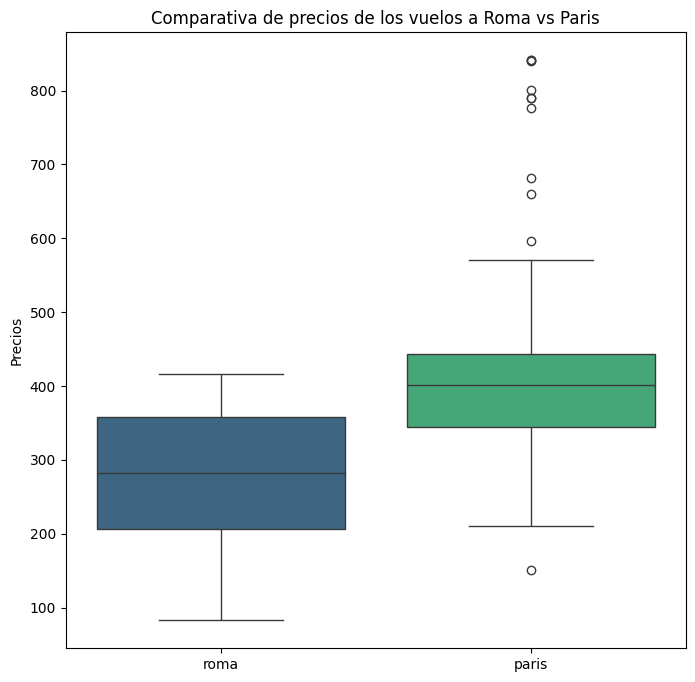

In [372]:
df_vuelos_roma_aux = df_vuelos_roma
df_vuelos_paris_aux = df_vuelos_paris

df_vuelos_roma_aux["ciudad"]="roma"
df_vuelos_paris_aux["ciudad"]="paris"

df= pd.concat([df_vuelos_roma_aux, df_vuelos_paris_aux])

plt.figure(figsize = (8,8))
sns.boxplot(x = "ciudad",
            y = "precio",
            data = df, 
            palette = 'viridis')

plt.title("Comparativa de precios de los vuelos a Roma vs Paris")
plt.xlabel("")
plt.ylabel("Precios")
plt.show()

Efectivamente comprobamos que la mediana del precio en Roma está bastante por debajo comparada con la de París. Además, podemos observar de una forma muy clara los outlayers de París.

### Veamos cuales son el top 5 de vuelos más baratos para ambos destinos:

In [373]:
precios_bajos_roma=list(df_vuelos_roma["precio"].value_counts().sort_index().index[:5])
precios_bajos_roma

[82.73, 87.98, 100.73, 101.97, 104.97]

In [374]:
precios_bajos_paris=list(df_vuelos_paris["precio"].value_counts().sort_index().index[:5])
precios_bajos_paris

[150.73, 210.54, 244.73, 250.04, 253.73]

Podemos ver que para roma de la primer a la quinata opción solo hay una diferencia de 22 euros mientras que para París asciende a 100 euros. Lo que nos permite en el caso de Roma que sin salirnos mucho de un presupuesto bajo podamos tener una mejor elección en cuanto a escalas y hora de salida de los vuelos.

Veamos como son estos vuelos:

In [375]:
filtro1 = df_vuelos_roma["precio"].isin(precios_bajos_roma)
df_vuelos_roma[filtro1]

,precio,origen_ida,destino_ida,min_duracion_ida,escalas_ida,hora_salida_ida,hora_llegada_ida,aerolinea_ida,origen_vuelta,destino_vuelta,min_duracion_vuelta,escalas_vuelta,hora_salida_vuelta,hora_llegada_vuelta,aerolinea_vuelta,ciudad
0,82.73,Madrid,Rome Fiumicino,145,0,21:45:00,00:10:00,Ryanair,Rome Fiumicino,Madrid,155,0,07:10:00,09:45:00,Ryanair,roma
5,104.97,Madrid,Rome Fiumicino,150,0,22:25:00,00:55:00,Wizz Air Malta,Rome Fiumicino,Madrid,160,0,06:15:00,08:55:00,Wizz Air Malta,roma
6,87.98,Madrid,Rome Fiumicino,145,0,21:45:00,00:10:00,Ryanair,Rome Fiumicino,Madrid,160,0,06:15:00,08:55:00,Wizz Air Malta,roma
9,100.73,Madrid,Rome Fiumicino,150,0,22:25:00,00:55:00,Wizz Air Malta,Rome Fiumicino,Madrid,155,0,07:10:00,09:45:00,Ryanair,roma
11,101.97,Madrid,Rome Fiumicino,145,0,21:45:00,00:10:00,Ryanair,Rome Fiumicino,Madrid,365,1,07:10:00,13:15:00,Vueling Airlines,roma


Los de Roma podemos ver que la duración de ida y vuelta esta entre 145 o 150, que no hay escalas, pero que las horas de salida y llegada son bastante tarde e igual nos interesaría salir antel el dia de ida para poder aprovechar todo el día en la ciudad o volver más tarde el día de la vuelta. Además las compañias son Ryanair y Wizz e igual nos gstaría poder seleccionar otras como Iberia o ITA Airways que no son tan low cost.

In [376]:
filtro2 = df_vuelos_paris["precio"].isin(precios_bajos_paris)
df_vuelos_paris[filtro2]

,precio,origen_ida,destino_ida,min_duracion_ida,escalas_ida,hora_salida_ida,hora_llegada_ida,aerolinea_ida,origen_vuelta,destino_vuelta,min_duracion_vuelta,escalas_vuelta,hora_salida_vuelta,hora_llegada_vuelta,aerolinea_vuelta,ciudad
0,150.73,Madrid,Paris Charles de Gaulle,130,0,21:40:00,23:50:00,Iberia,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Iberia,paris
2,210.54,Madrid,Paris Charles de Gaulle,130,0,15:45:00,17:55:00,Iberia,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Iberia,paris
14,244.73,Madrid,Paris Charles de Gaulle,130,0,12:25:00,14:35:00,Air France,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Air France,paris
17,244.73,Madrid,Paris Charles de Gaulle,130,0,16:20:00,18:30:00,Air France,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Air France,paris
18,253.73,Madrid,Paris Charles de Gaulle,130,0,17:55:00,20:05:00,Air France,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Air France,paris
22,250.04,Madrid,Paris Charles de Gaulle,135,0,14:45:00,17:00:00,easyJet,Paris Charles de Gaulle,Madrid,130,0,07:00:00,09:10:00,Iberia,paris


En el caso de los vuelos de Francia, todos tardan 130 min tanto en ir como en volver, lo que está genial porque es lo mínimo. Los vuelos de ida tienen horarios a o largo de la tarde, sin embargo, los de vuelta son todos muy tempano.

Si nuestro viajero en solitario fuera una persona joven y priorizara el precio antes que el horario de ida o vuelta con estas tablas podría seleccionar uno de los 5 más baratos, siendo Roma evidentemente más asequible que París. Sin embargo, supongamos que nuestro viajero es una persona más adulta la cual prefiere pagar un poco más y no tener que madrugar demasiado ni llegar demasiado tarde. Veamos los vuelos que salen entres las 9 y las 19 para poder aprovechar un poco el día y los que vuelven más tarde de las 16 para aprovechar también el día de la vuelta.

In [377]:
filtro_h1_roma=df_vuelos_roma["hora_salida_ida"] > pd.to_datetime("09:00").time()
filtro_h2_roma=df_vuelos_roma["hora_salida_ida"] < pd.to_datetime("19:00").time()
filtro_h3_roma=df_vuelos_roma["hora_salida_vuelta"] > pd.to_datetime("16:00").time()

In [378]:
df_vuelos_roma[filtro_h1_roma & filtro_h2_roma & filtro_h3_roma]

,precio,origen_ida,destino_ida,min_duracion_ida,escalas_ida,hora_salida_ida,hora_llegada_ida,aerolinea_ida,origen_vuelta,destino_vuelta,min_duracion_vuelta,escalas_vuelta,hora_salida_vuelta,hora_llegada_vuelta,aerolinea_vuelta,ciudad
50,298.97,Madrid,Rome Fiumicino,145,0,18:55:00,21:20:00,Ryanair,Rome Fiumicino,Madrid,160,0,19:00:00,21:40:00,Wizz Air Malta,roma
67,349.38,Madrid,Rome Fiumicino,145,0,12:50:00,15:15:00,Ryanair,Rome Fiumicino,Madrid,160,0,19:00:00,21:40:00,Wizz Air Malta,roma
85,383.65,Madrid,Rome Fiumicino,150,0,18:00:00,20:30:00,ITA Airways,Rome Fiumicino,Madrid,160,0,19:00:00,21:40:00,Wizz Air Malta,roma
91,388.73,Madrid,Rome Fiumicino,150,0,09:40:00,12:10:00,Wizz Air Malta,Rome Fiumicino,Madrid,160,0,19:00:00,21:40:00,Wizz Air Malta,roma


Para Roma hemos obtenido 4 vuelos que cumplen con los filtros indicados. De ellos el que mejor aprovecharía el fin de semana sería el que sale a las 12, una hora muy cómoda, y vuelve a las 19 con ninguna escala. El precio de este serían 388 lo cual se sube bastante en comparación a los más baratos. Por 100 menos también podríamos coger uno que sale a las 7 y vuelve a las 7 sin escalas.

In [387]:
filtro_h1_paris = df_vuelos_paris["hora_salida_ida"] > pd.to_datetime("09:00").time()
filtro_h2_paris = df_vuelos_paris["hora_salida_ida"] < pd.to_datetime("19:00").time()
filtro_h3_paris = df_vuelos_paris["hora_salida_vuelta"] > pd.to_datetime("16:00").time()

df_paris_filtros = df_vuelos_paris[filtro_h1_paris & filtro_h2_paris & filtro_h3_paris]
print(df_paris_filtros.shape)
df_paris_filtros["precio"].describe()

(28, 16)


count     28.000000
mean     534.109643
std      171.846624
min      357.650000
25%      389.480000
50%      472.880000
75%      665.047500
max      841.010000
Name: precio, dtype: float64

En cambio para París hay 28 opciones que cumplen con los filtros, siendo la opción más barata 357 euros y de media 472, más caro que para los vuelos que cumplían los mismos filtros a Roma.

### Finalmente también se podría permitir elegir por aerolínea o ver los precios de media que tiene cada aerolínea.

- Para Roma:

In [112]:
print(df_vuelos_roma["aerolinea_ida"].unique())
print(df_vuelos_roma["aerolinea_vuelta"].unique())

['Ryanair' 'Wizz Air Malta' 'Vueling Airlines' 'ITA Airways' 'Air Europa'
 'TAP Air Portugal' 'Iberia' 'KLM']
['Ryanair' 'Wizz Air Malta' 'Vueling Airlines' 'ITA Airways' 'Iberia'
 'Air Europa']


In [396]:
df_vuelos_roma.groupby("aerolinea_ida").mean(numeric_only=True)["precio"]

aerolinea_ida
Air Europa          339.646667
ITA Airways         299.905263
Iberia              370.460769
KLM                 201.020000
Ryanair             199.172273
TAP Air Portugal    169.156667
Vueling Airlines    217.688571
Wizz Air Malta      279.980769
Name: precio, dtype: float64

In [398]:
df_vuelos_roma.groupby("aerolinea_vuelta").mean(numeric_only=True)["precio"]

aerolinea_vuelta
Air Europa          385.720000
ITA Airways         300.722609
Iberia              369.585333
Ryanair             215.941923
Vueling Airlines    235.048571
Wizz Air Malta      253.354615
Name: precio, dtype: float64

In [394]:
df_roma_ida = pd.DataFrame(df_vuelos_roma.groupby("aerolinea_ida").mean(numeric_only=True)["precio"].sort_values())
df_roma_ida.reset_index(inplace=True)

df_roma_vuelta = pd.DataFrame(df_vuelos_roma.groupby("aerolinea_vuelta").mean(numeric_only=True)["precio"].sort_values())
df_roma_vuelta.reset_index(inplace=True)

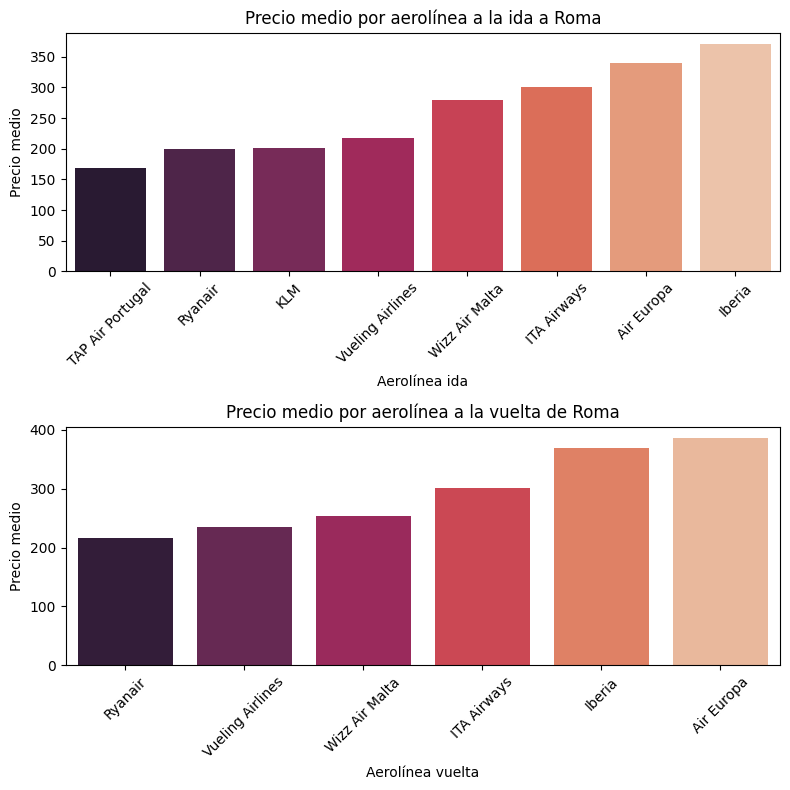

In [402]:
fig, axes = plt.subplots(2,1, figsize=(8,8))
sns.barplot(x = "aerolinea_ida", y="precio", data = df_roma_ida, palette="rocket", ax=axes[0])
sns.barplot(x = "aerolinea_vuelta", y="precio", data = df_roma_vuelta, palette="rocket", ax=axes[1])

axes[0].set_title("Precio medio por aerolínea a la ida a Roma")
axes[1].set_title("Precio medio por aerolínea a la vuelta de Roma")

axes[0].set_xlabel("Aerolínea ida")
axes[0].set_ylabel("Precio medio")
axes[1].set_xlabel("Aerolínea vuelta")
axes[1].set_ylabel("Precio medio")


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Para Roma ofrecen vuelos 8 compañias distintas a la ida y 6 a la vuelta ese fin de semana. De media por comañía los precios de vuelta son superioires que los de ida. Entre las más baratas tanto para la ida como para la vuelta tenemos a Ryanair y a la cola de las más caras están Iberia y Air Europa.

- Para París:

In [111]:
print(df_vuelos_paris["aerolinea_ida"].unique())
print(df_vuelos_paris["aerolinea_vuelta"].unique())

['Iberia' 'Air France' 'Vueling Airlines' 'easyJet' 'easyJet Europe'
 'Scandinavian Airlines' 'British Airways' 'KLM' 'ITA Airways' 'Lufthansa']
['Iberia' 'Air France' 'easyJet' 'Vueling Airlines' 'easyJet Europe'
 'Lufthansa' 'British Airways' 'KLM' 'Royal Air Maroc' 'ITA Airways'
 'Scandinavian Airlines' 'Bulgaria Air']


In [110]:
df_vuelos_paris.groupby("aerolinea_ida").mean(numeric_only=True)["precio"].sort_values()

aerolinea_ida
Air France               356.780000
Iberia                   387.846667
Vueling Airlines         389.257143
KLM                      398.380000
easyJet Europe           400.750000
British Airways          401.331111
ITA Airways              422.110000
Lufthansa                481.880000
easyJet                  514.335714
Scandinavian Airlines    701.730000
Name: precio, dtype: float64

In [114]:
df_vuelos_paris.groupby("aerolinea_vuelta").mean(numeric_only=True)["precio"].sort_values()

aerolinea_vuelta
Vueling Airlines         330.266667
Air France               357.315789
Bulgaria Air             365.000000
Lufthansa                382.480000
easyJet Europe           400.750000
British Airways          412.862500
Royal Air Maroc          423.666667
Iberia                   426.233846
KLM                      428.280000
ITA Airways              442.450000
easyJet                  509.642222
Scandinavian Airlines    815.315000
Name: precio, dtype: float64

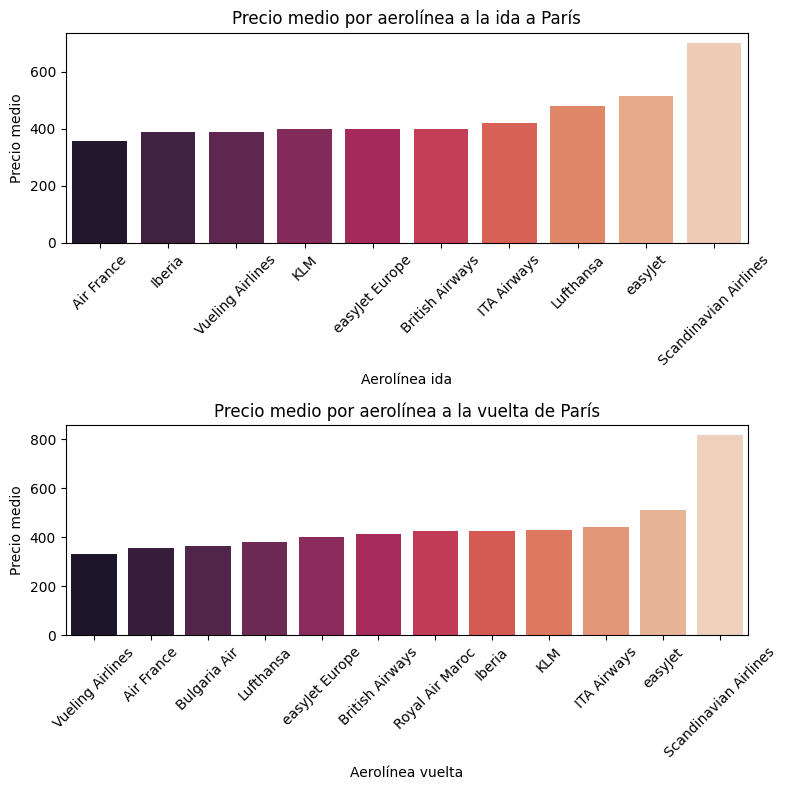

In [403]:
df_paris_ida = pd.DataFrame(df_vuelos_paris.groupby("aerolinea_ida").mean(numeric_only=True)["precio"].sort_values())
df_paris_ida.reset_index(inplace=True)

df_paris_vuelta = pd.DataFrame(df_vuelos_paris.groupby("aerolinea_vuelta").mean(numeric_only=True)["precio"].sort_values())
df_paris_vuelta.reset_index(inplace=True)

fig, axes = plt.subplots(2,1, figsize=(8,8))
sns.barplot(x = "aerolinea_ida", y="precio", data = df_paris_ida, palette="rocket", ax=axes[0])
sns.barplot(x = "aerolinea_vuelta", y="precio", data = df_paris_vuelta, palette="rocket", ax=axes[1])

axes[0].set_title("Precio medio por aerolínea a la ida a París")
axes[1].set_title("Precio medio por aerolínea a la vuelta de París")

axes[0].set_xlabel("Aerolínea ida")
axes[0].set_ylabel("Precio medio")
axes[1].set_xlabel("Aerolínea vuelta")
axes[1].set_ylabel("Precio medio")


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Para ir a París la cosa cambia, entre la compañias más baratas podríamos destacar Air France o Vueling Airlines y claramente la de mayor presupuesto es Scandinavian Airlines dando un salto de 200 euros más de media con respecto a penúltima más cara.

En este punto una vez analizados los itinerarios a grandes rasgos podemos concluir que claramente ir a Roma es mucho más barato y con más opciones económicas de vuelos que París.

## **Hoteles**

Cargamos los dataframes con la información de los hoteles:

In [167]:
df_hoteles_roma = pd.read_csv("../datos/df_hoteles_rome.csv")
df_hoteles_roma.drop("Unnamed: 0", axis=1, inplace=True)

df_hoteles_paris = pd.read_csv("../datos/df_hoteles_paris.csv")
df_hoteles_paris.drop("Unnamed: 0", axis=1, inplace=True)


In [166]:
df_hoteles_roma.isnull().sum()

hotel                   0
puntuacion              0
precio_total            0
direccion               0
cancelacion_gratuita    0
hora_checkout           0
dist_coliseo            0
dtype: int64

In [168]:
df_hoteles_paris.isnull().sum()

hotel                   0
puntuacion              1
precio_total            0
direccion               0
cancelacion_gratuita    0
hora_checkout           0
dist_louvre             0
dtype: int64

Solo hay un valor nulo en una de las puntaciones, por lo demás los dataframes no tienen más nulos por lo que podemos comenzar a analizar los hoteles.

### Veamos un poco los datos de ambas tablas:

In [173]:
df_hoteles_roma.describe().T

,count,mean,std,min,25%,50%,75%,max
puntuacion,196.0,8.664286,0.502762,6.90,8.30,8.600,9.000000,9.80
precio_total,196.0,496.011491,254.442114,86.76,336.14,425.280,583.876705,1999.20
dist_coliseo,196.0,2.160204,1.262268,0.13,1.45,1.935,2.555000,8.79


En Roma la media de puntuación de los hoteles obtenidos es de 8.6, practicamente igual a la mediana. El precio total por las dos noches del fin de semana es de 496 euros un poco por encima de la mediana que es 425, lo que nos indica que hay algún hotel bastante caro, siendo el precio máximo de 2000 euros y el mínimo unos 90. En cuanto a la distancia a nuestro punto de referencia que es el coliseo, la media está a unos 2km.

In [174]:
df_hoteles_paris.describe().T

,count,mean,std,min,25%,50%,75%,max
puntuacion,199.0,8.234673,0.558727,6.90,7.9000,8.300,8.6000,9.60
precio_total,200.0,450.542040,466.300129,134.56,209.4200,361.135,512.0400,4259.80
dist_louvre,200.0,4.752850,2.822506,0.42,2.4475,4.540,6.7575,12.02


Para París tenemos una puntuación media en los hoteles de 8.2. El precio medio para las dos noches en París es de 450 euros, bastante por encima de la mediana que son 361. De nuevo esto indica que hay valores muy altos como podemos corroborar viendo que el precio máximo es de 4260 mientras que el mínimo es de 135. Finalmente, al punto de referencia que es el Louvre están todos de media a unos 4.75km, lo cual es bastante, pero cuanto más nos acerquemos al centro más subirán los precios. 

### Comparativa de precios bajos:

In [175]:
hoteles_bajos_roma=list(df_hoteles_roma["precio_total"].value_counts().sort_index().index[:5])
hoteles_bajos_roma

[86.76, 182.5, 188.99, 211.37, 211.64]

In [176]:
hoteles_bajos_paris=list(df_hoteles_paris["precio_total"].value_counts().sort_index().index[:5])
hoteles_bajos_paris

[134.56, 137.8, 137.97, 145.9, 146.2]

Podemos ver que aunque Roma tenga el hotel más barato los 4 restantes son mucho más caros que los 5 primeros de Francia. Por lo que todo parce indicar que el alojamiento en Roma es más caro. Veamos como son estos hoteles del top 5 en precios bajos.

In [178]:
filtro1 = df_hoteles_roma["precio_total"].isin(hoteles_bajos_roma)
df_hoteles_roma[filtro1]

,hotel,puntuacion,precio_total,direccion,cancelacion_gratuita,hora_checkout,dist_coliseo
19,hu Roma Camping In Town,7.9,86.76,"Camping Village Roma, Via di Villa Troili, Mun...",SI,10:00,7.36
85,Casale De Santis,8.5,211.37,"Via Labico, Municipio Roma V, Roma, Roma Capit...",NO,10:30,4.58
132,Aurelia Vatican Apartments,8.5,211.64,"Via dei Laterizi, Municipio Roma XIV, Roma, Ro...",NO,12:00,5.23
155,Hotel Roma Tiburtina Metro,8.2,188.99,"Ponte Mammolo, Municipio Roma IV, Roma, Roma C...",NO,11:00,7.35
177,City Guest House,8.3,182.50,"72, Viale Opita Oppio, Quadraretto, Municipio ...",NO,10:00,5.73


Como podíamos esperar, el más barato es el que tiene la puntuación más baja y está bastante lejos del coliseo. por lo general resto tienen una puntuación buena aunque siguen sin estar muy cerca del centro.

In [179]:
filtro2 = df_hoteles_paris["precio_total"].isin(hoteles_bajos_paris)
df_hoteles_paris[filtro2]

,hotel,puntuacion,precio_total,direccion,cancelacion_gratuita,hora_checkout,dist_louvre
17,Kyriad Le Bourget Centre- Parc Des Expositions,7.3,134.56,Parking Zenpark Le Bourget - Parc des Expositi...,NO,12:00,11.09
18,hotelF1 Paris Porte de Châtillon,7.3,137.97,"Dojo de Paris, 21/25, Avenue de la Porte de Ch...",NO,12:00,4.60
39,City Résidence Paris Saint-Maurice,8.0,146.20,"Appart'City Saint-Maurice, 18, Rue du Maréchal...",NO,11:00,7.88
166,Campanile Paris Est Bobigny,7.2,145.90,"Hôtel Campanile, Avenue Paul Vaillant-Couturie...",NO,12:00,10.07
181,Séjours & Affaires Paris Bagneux,7.7,137.80,"Impasse Jeanne d'Arc, Résidence du Port Galand...",NO,11:00,7.58


Para los hoteles más baratos de París las puntuaciones son más bajas y las distancias al centro son bastante mejorables.

Podemos observar mejor esta diferencia en cuanto a precios mediante un gráfico.

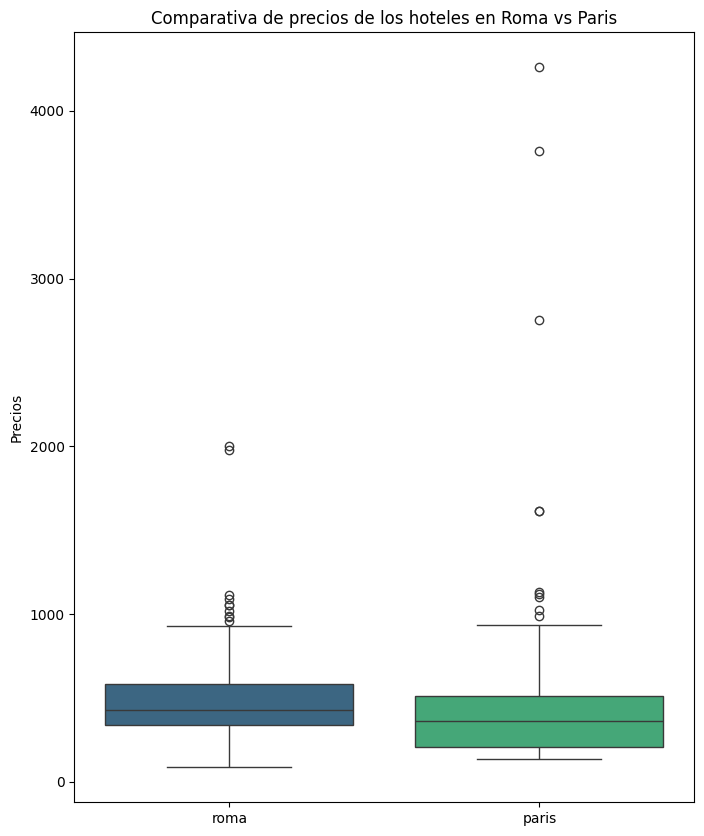

In [220]:
df_hoteles_roma_aux = df_hoteles_roma
df_hoteles_paris_aux = df_hoteles_paris

df_hoteles_roma_aux["ciudad"]="roma"
df_hoteles_paris_aux["ciudad"]="paris"

df= pd.concat([df_hoteles_roma_aux, df_hoteles_paris_aux])

plt.figure(figsize = (8,10))
sns.boxplot(x = "ciudad",
            y = "precio_total",
            data = df, 
            palette = 'viridis')

plt.title("Comparativa de precios de los hoteles en Roma vs Paris")
plt.xlabel("")
plt.ylabel("Precios")
plt.show()

Observamos como la mediana de Roma está ligeramente por encima de la de París, sin embargo, los precios mínimos de París son más bajos que los de Roma. Podemos observar una gran cantidad de outlayers en París mostrando precios muy muy superiores, los cuales podrían tener como cliente objetivo a personas que viajan solamente a hoteles de lujo.

### Veamos por puntuaciones cual es el precio medio de los hoteles:

- Para Roma

In [192]:
df_puntuaciones = pd.DataFrame(df_hoteles_roma.groupby("puntuacion").mean(numeric_only=True)["precio_total"].sort_index(ascending=False))
df_puntuaciones=df_puntuaciones.reset_index()

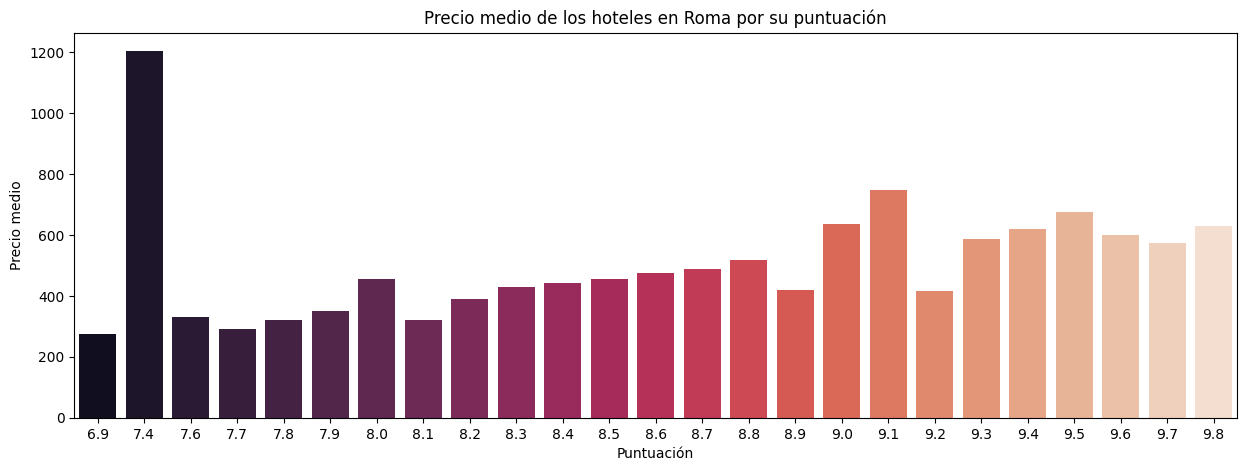

In [231]:
plt.figure(figsize = (15,5))

sns.barplot(x="puntuacion", 
            y="precio_total",
            data = df_puntuaciones,
            palette="rocket",
            )

plt.title("Precio medio de los hoteles en Roma por su puntuación")
plt.xlabel("Puntuación")
plt.ylabel("Precio medio")
plt.show()

Como podemos ver, es bastante fácil de deducir cuanto mayor es la puntuación mayor es el precio, sin embargo hay valores que nos llaman la atención como algún hotel que tiene 7.4 de puntuación pero es muy caro, o algún hotel de 9.2 de puntuación pero muy barato. De esta forma podemos coger los hoteles con mayores puntuaciones pero baratos e investigar cual sería mejor para nuestro cliente.

- Para París:

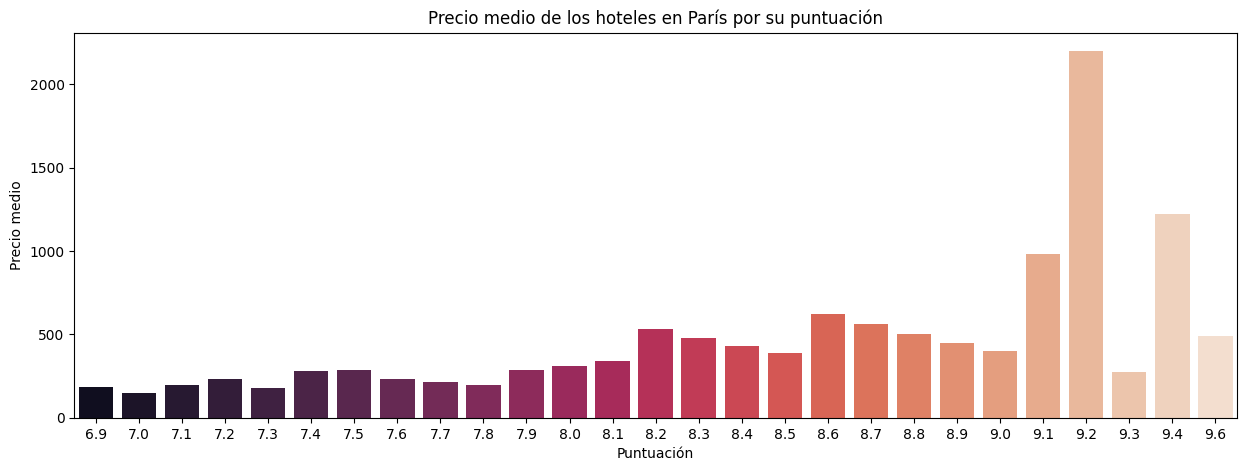

In [357]:
df_puntuaciones_p = pd.DataFrame(df_hoteles_paris.groupby("puntuacion").mean(numeric_only=True)["precio_total"].sort_index(ascending=False))
df_puntuaciones_p=df_puntuaciones_p.reset_index()

plt.figure(figsize = (15,5))

sns.barplot(x="puntuacion", 
            y="precio_total",
            data = df_puntuaciones_p,
            palette="rocket",
            )

plt.title("Precio medio de los hoteles en París por su puntuación")
plt.xlabel("Puntuación")
plt.ylabel("Precio medio")
plt.show()

Al contrario que en Roma, en París hay un gran repunte de los hoteles con una puntuación de 9.2, el gráfico tampoco parece presentar una tendencia ascendente pero si lo miramos de forma individual podemos ver que la media de los hoteles con puntuación 9.3 es bastante baja, por lo que investigando los hoteles con dicha puntuación podríamos encontrar un hotel de calidad e igual de caro que otro con menos puntuación.

## Precios por cercanía al centro

Finalmente podemos tener en cuenta como de cerca está el hotel del centro, lo que puede se decisivo para muchas personas que igual prefieren pagar un poco más y no tener que desplazarse mucho todos los días.

- Para Roma:

In [236]:
# Hacemos un pequeño filtrado para librarnos de los outlayers y que se vea mejor la gráfica.
df_aux1 = df_hoteles_roma[(df_hoteles_roma["dist_coliseo"]<4) & (df_hoteles_roma["precio_total"]<1000)]

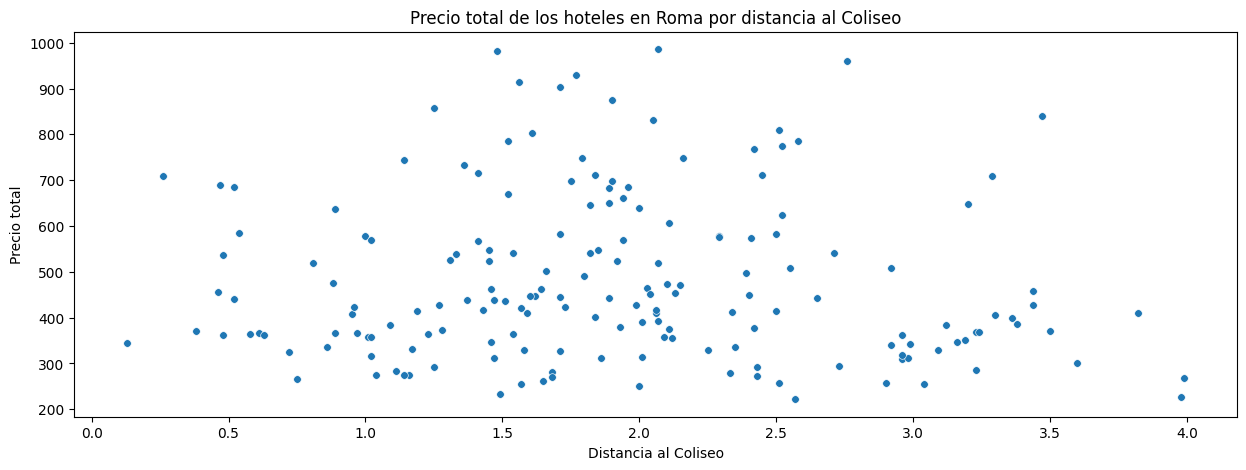

In [237]:
plt.figure(figsize = (15,5))
sns.scatterplot(y = "precio_total",
                x = "dist_coliseo",
                data = df_aux1,
                s = 30)

plt.title("Precio total de los hoteles en Roma por distancia al Coliseo")
plt.xlabel("Distancia al Coliseo")
plt.ylabel("Precio total")
plt.show()

Mediante esta gráfica podemos ver que hay un poco de todo, hay hoteles cercanos caros y baratos al igual que si nos vamos más lejos también los hay caros, por lo que si lo que más nos importa es estar cerca del centro y pagar poco podríamos filtrar aún más la gráfica y coge los hoteles que estén a menos de X km y que cuesten menos de Y precio. Lo que está claro es que los precios disminuyen cuando nos vamos un poco más lejos de 1km, sin embargo,hay un hotel a 
0,75km que parece bastante barato y podría ser un opción atractiva.

- Para Paris:

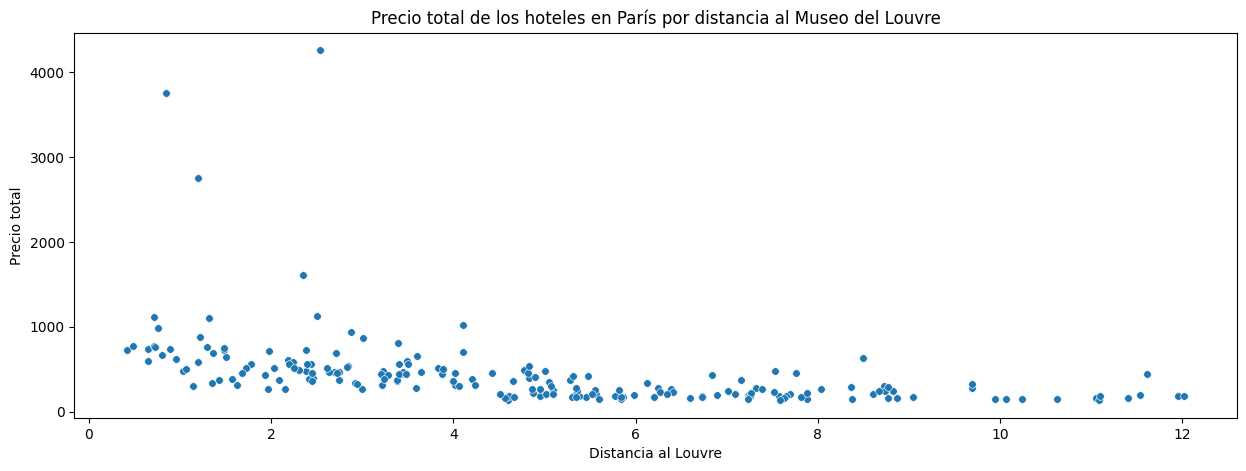

In [358]:
plt.figure(figsize = (15,5))
sns.scatterplot(y = "precio_total",
                x = "dist_louvre",
                data = df_hoteles_paris,
                s = 30)

plt.title("Precio total de los hoteles en París por distancia al Museo del Louvre")
plt.xlabel("Distancia al Louvre")
plt.ylabel("Precio total")
plt.show()

En esta gráfica se ve mucho más claro que cuanto más nos alejamos más bajan los precios. A partir de los 4 km comienza a haber opciones más económicas, aunque estaríamos lejos del centro, por lo que en París si queremos un alojamiento en un hotel céntrico va a haber que aumentar un poco el presupuesto.

## **Actividades**

Cargamos los datos y los revisamos:

In [291]:
df_acti_roma = pd.read_csv("../datos/df_actividades_roma.csv", index_col=0)
df_acti_paris = pd.read_csv("../datos/df_actividades_paris.csv", index_col=0)


In [292]:
df_acti_roma.isna().sum()

actividad              0
categoria              0
cancelacio_gratuita    0
puntuacion             1
opiniones              0
duracion               1
idioma                 7
precio                 0
dtype: int64

Las actividades que no tienen idioma o duración se debe al caracter de la actividad por lo que los nulos son correctos y hay una que carece de puntuación pero la mantenemos para que aporte el resto de los datos.

In [293]:
df_acti_paris.isna().sum()

actividad               0
categoria               0
cancelacio_gratuita     0
puntuacion              2
opiniones               1
duracion                1
idioma                 18
precio                  0
dtype: int64

Los nulos en los idimas son compensibles pues hay actividades que no son habladas por lo que no se especifica idioma. Hay una que no tiene duración que también se debe al carcter de la actividad y 2 que no tienen puntuación, sin embargo como el resto de los campos si que los tienen las mantendremos.

A la hora de revisar los tipos de datos y pasar alguno a tipo int nos hemos dado cuenta de que en el campo de opiniones de ambas tablas se ha colado un dato no numérico, lo eliminamos y convertimos la columna a tipo float:

In [294]:
df_acti_roma["opiniones"].replace(") Opiniones", 0, inplace=True)
df_acti_roma["opiniones"] = df_acti_roma["opiniones"].astype(float)

df_acti_paris["opiniones"].replace(") Opiniones", 0, inplace=True)
df_acti_paris["opiniones"] = df_acti_paris["opiniones"].astype(float)

Transformamos las opiniones a número:

In [295]:
df_acti_roma["puntuacion"]=df_acti_roma["puntuacion"].str.replace("/10", "").str.replace(",", ".")
df_acti_paris["puntuacion"]=df_acti_paris["puntuacion"].str.replace("/10", "").str.replace(",", ".")

df_acti_roma["puntuacion"]=df_acti_roma["puntuacion"].astype(float)
df_acti_paris["puntuacion"]=df_acti_paris["puntuacion"].astype(float)

Finalente, en cuanto a la duración, en algunos idcida la hora de comienxo de la actividad y en otros la duración en sí, por lo que es una columna ver´stil que mantendremos como tipo object.

Una vez hemos comprobado las tablas comenzmos el análisis.

In [298]:
df_acti_roma.describe().T

,count,mean,std,min,25%,50%,75%,max
puntuacion,40.0,9.432500,0.294729,8.7,9.275,9.50,9.7,9.8
opiniones,41.0,456.731707,359.640656,0.0,234.000,280.00,665.0,1352.0
precio,41.0,144.762927,171.848123,0.0,45.000,72.25,164.0,775.0


Para las actividades de roma de media hay 456 opiniones por actividad, lo cual dista mucho de la mediana de 280, lo que nos indica que hay varias actividades muy populares con muchos comentarios. En cuanto al precio de media por actividad son 144 euros, sin embargo, la mediana es de 72 euros. De nuevo est nos indica que hay varias actividades muy caras que están haciendo ruido en la media, como podemos ver el precio máximo de una ctividad llegan a ser 775 euros. la puntuación de todas las actividades por lo general es bastante alta con una media de 9.4.

In [299]:
df_acti_paris.describe().T

,count,mean,std,min,25%,50%,75%,max
puntuacion,55.0,9.498182,0.244564,9.0,9.3,9.5,9.7,10.0
opiniones,56.0,550.000000,576.529302,0.0,155.0,356.5,737.5,2464.0
precio,57.0,144.545614,206.945909,0.0,40.1,79.9,161.0,990.0


La gran diferencia que  podemos observar es que el precio medio por actividad es de 550 con una mediana de 356, lo que indica que hay actividades muy caras que afectan a la media, la actividad más cara es de 2464 euros. Aún asi la mediana es 70 euros supeior a la de las actividades en Roma. En cuanto a la puntuación de media y mediana tiene lo mismo que las actividades romanas y de opiniones un poquito más.

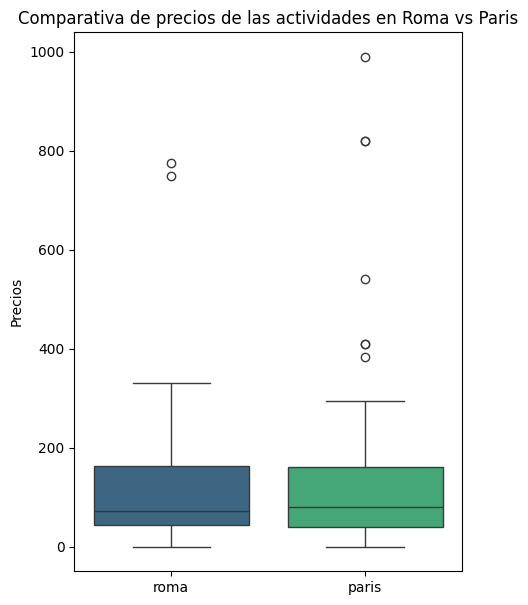

In [331]:
df_acti_roma_aux = df_acti_roma
df_acti_paris_aux = df_acti_paris

df_acti_roma_aux["ciudad"]="roma"
df_acti_paris_aux["ciudad"]="paris"

df= pd.concat([df_acti_roma_aux, df_acti_paris_aux])

plt.figure(figsize = (5,7))
sns.boxplot(x = "ciudad",
            y = "precio",
            data = df, 
            palette = 'viridis')

plt.title("Comparativa de precios de las actividades en Roma vs Paris")
plt.xlabel("")
plt.ylabel("Precios")
plt.show()

Es más fácil de observr en la gráfica estas conclusiones, donde las medianas de ambas actividades por ciudad son similares aunque ligeramente superior la de París. Y viendo como en parís teemos varios outlayers los cuales son los que nos perturbaban la media del precio.

Veamos cuántas actividades hay por categorías:

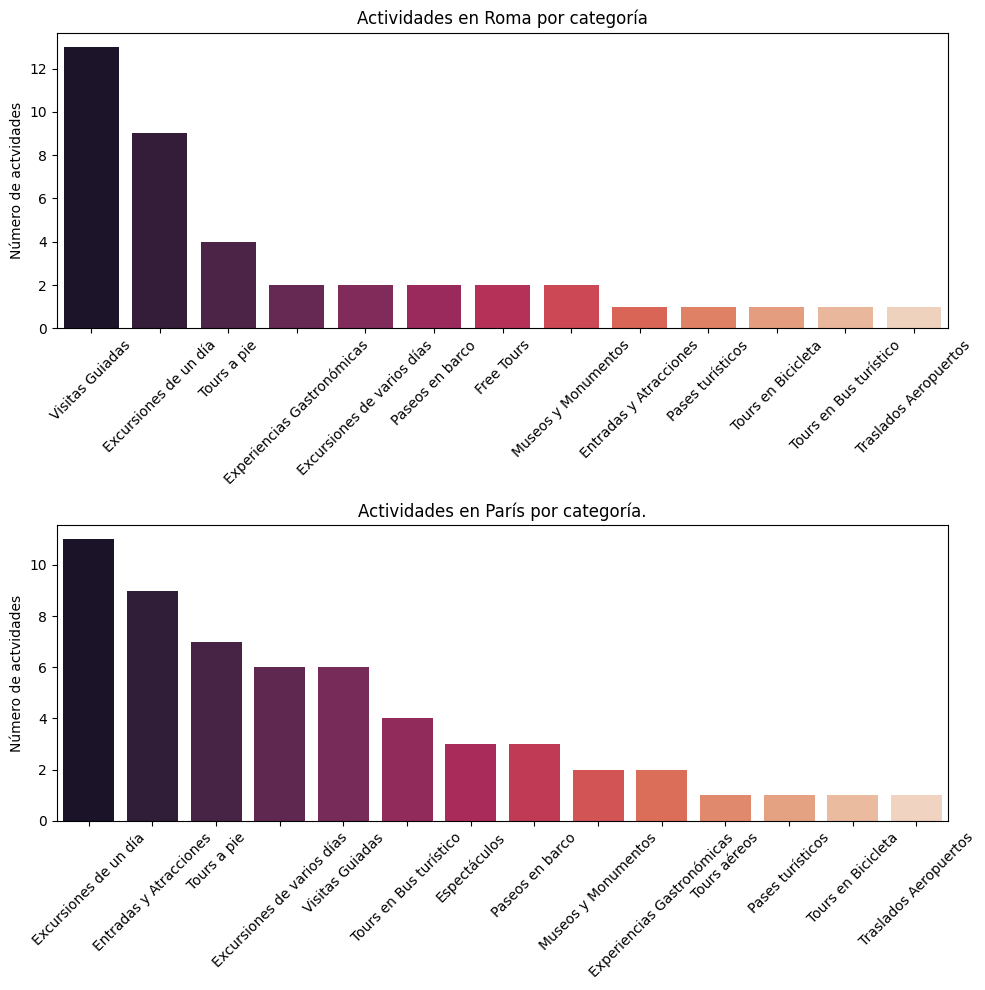

In [328]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

order_list1 = list(df_acti_roma.groupby("categoria").count()["actividad"].sort_values(ascending=False).index)
order_list2 = list(df_acti_paris.groupby("categoria").count()["actividad"].sort_values(ascending=False).index)

sns.countplot(x = "categoria", data = df_acti_roma,  palette='rocket', order = order_list1, ax=axes[0])
sns.countplot(x = "categoria", data = df_acti_paris, palette="rocket", order = order_list2, ax=axes[1])

axes[0].set_title("Actividades en Roma por categoría")
axes[1].set_title("Actividades en París por categoría.")

axes[0].set_xlabel("")
axes[0].set_ylabel("Número de actvidades")
axes[1].set_xlabel("")
axes[1].set_ylabel("Número de actvidades")


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()  # Ajustar el layout para que no se solapen
plt.show()

Por lo que en roma las actividades más populares son: Visitas guiadas, escursiones de un día y tours a pie. Mientras que en parís son: excursiones de un día, entradas y atracciones y tours a pie.

Veamos también cual es el precio medio por categoría:

In [352]:
df_acti_precio_roma = pd.DataFrame(df_acti_roma.groupby("categoria").mean(numeric_only=True)["precio"])
df_acti_precio_roma.reset_index(inplace=True)

df_acti_precio_paris = pd.DataFrame(df_acti_paris.groupby("categoria").mean(numeric_only=True)["precio"])
df_acti_precio_paris.reset_index(inplace=True)

oreden_roma = list(df_acti_roma.groupby("categoria").mean(numeric_only=True)["precio"].sort_values().index)
oreden_paris = list(df_acti_paris.groupby("categoria").mean(numeric_only=True)["precio"].sort_values().index)

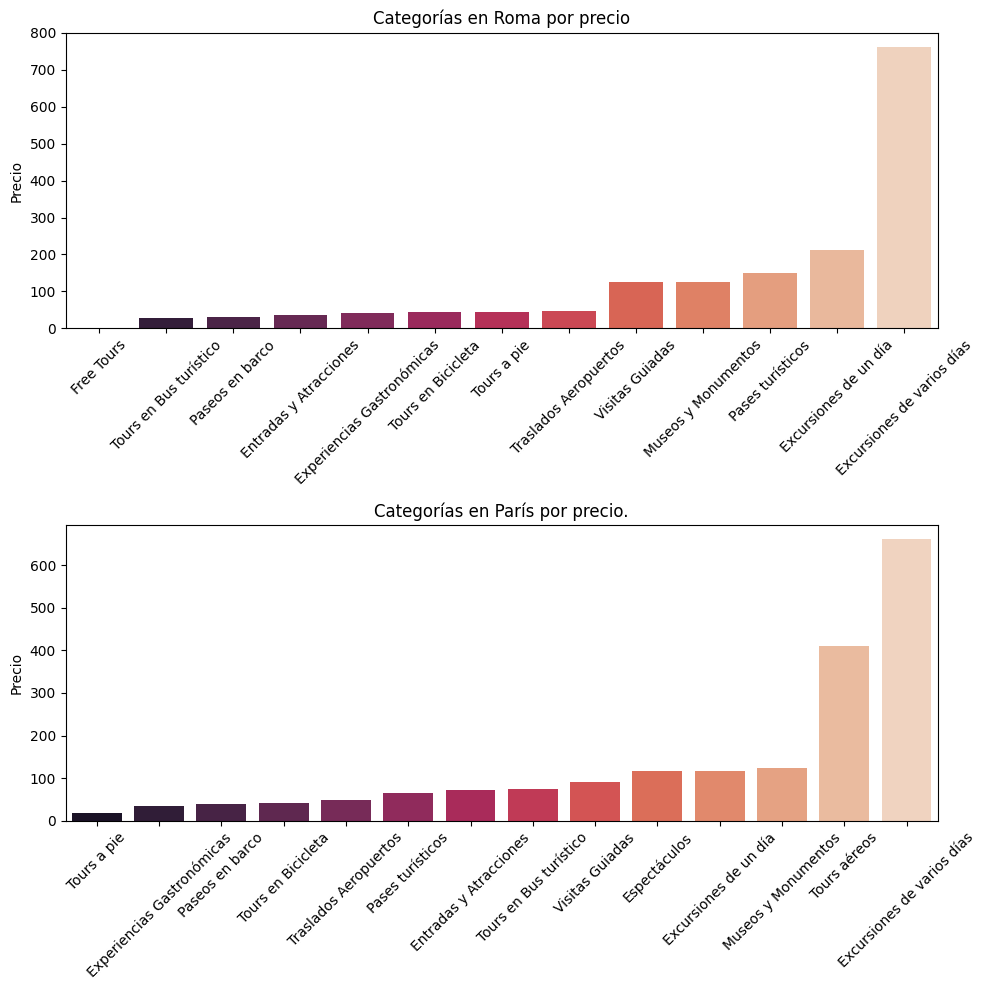

In [353]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.barplot(x="categoria", y="precio",data = df_acti_precio_roma, palette="rocket", order = oreden_roma, ax=axes[0])
sns.barplot(x="categoria", y="precio",data = df_acti_precio_paris, palette="rocket", order = oreden_paris, ax=axes[1])

axes[0].set_title("Categorías en Roma por precio")
axes[1].set_title("Categorías en París por precio.")

axes[0].set_xlabel("")
axes[0].set_ylabel("Precio")
axes[1].set_xlabel("")
axes[1].set_ylabel("Precio")


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()  # Ajustar el layout para que no se solapen
plt.show()

Por lo tanto podemos ver en ambas gráficas de menor a mayor el precio de media de las actividades por categorías, siendo las más baratas en Roma los free tours, tours en bus turístico y tours en barco y en París: tours a pie, experiencias gastronómicas y paseos en barco.